In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import train_test_split, cross_validate, KFold
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import random
import seaborn as sns

def get_model():
   model = Sequential()
   model.add(Dense(32, input_dim=13,  activation='relu'))
   model.add(Dense(12, activation='relu'))
   model.add(Dense(1, activation='sigmoid'))
   model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
   return model

trainset = pd.read_csv('heart-train.csv')
testset = pd.read_csv('heart-test.csv')

x_train = trainset.drop(['target'], axis=1).values
y_train = (trainset['target']).values

x_test = testset.drop(['target'], axis=1).values
y_test = (testset['target']).values

keras_clf = KerasClassifier(model = get_model, optimizer="adam", optimizer__learning_rate=0.001, batch_size=20 ,epochs=100, verbose=0)

kfold = KFold(n_splits=4)
scoring = ['accuracy', 'precision', 'recall', 'f1']
results = cross_validate(estimator=keras_clf, X=x_train, y=y_train, scoring=scoring, cv=kfold, return_train_score=True, return_estimator=True)

best_model = results['estimator'][2]

print(best_model.score(x_test, y_test))

0.8192893401015229


In [4]:
dataset = pd.concat([trainset,testset])
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000
mean,54.422388,0.696517,0.945274,131.612935,246.166169,0.148756,0.531841,149.141294,0.335821,1.071940,1.386070,0.755224,2.326866,0.514428
std,9.084647,0.459876,1.031119,17.473194,51.592820,0.355937,0.528182,22.999274,0.472394,1.175267,0.618453,1.031985,0.614350,0.499916
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

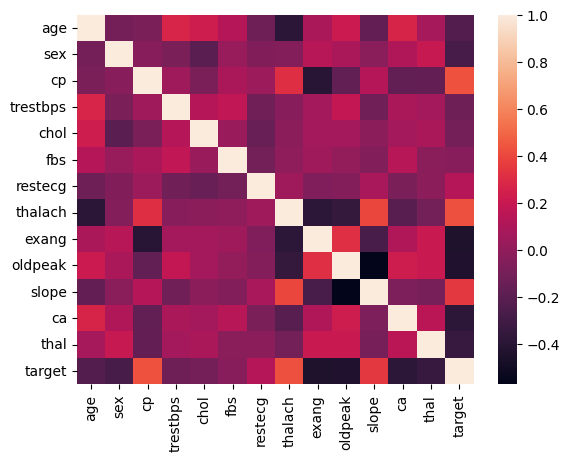

In [5]:
corr = dataset.corr()
sns.heatmap(corr, 
xticklabels=corr.columns.values,
yticklabels=corr.columns.values)

In [ ]:
dir(best_model)